In [1]:
!pip install numpy opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 18.7 MB/s eta 0:00:0000:0100:01


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [15]:
# 이미지 로드
image_path = 'data/_test_14.png'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# cv2.imread로 이미지를 로드, cv2.cvtColor로 RGB 형식으로 변환


In [44]:
# 임의의 바운딩 박스와 신뢰도 점수 생성 (ex)
boxes = np.array([                         # 네 개의 바운딩 박스
    [50, 50, 200, 200],
    [60, 60, 210, 210],
    [200, 200, 400, 400],
    [220, 220, 420, 420]
])

scores = np.array([0.9, 0.85, 0.75, 0.7]) # 각 바운딩 박스의 신뢰도 점수


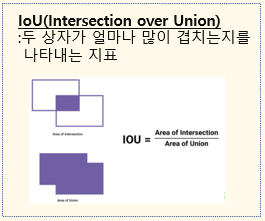

In [45]:
# IoU 계산 함수
def compute_iou(box, boxes):
    x1 = np.maximum(box[0], boxes[:, 0])
    y1 = np.maximum(box[1], boxes[:, 1])
    x2 = np.minimum(box[2], boxes[:, 2])
    y2 = np.minimum(box[3], boxes[:, 3])

    intersection = np.maximum(0, x2 - x1 + 1) * np.maximum(0, y2 - y1 + 1)
    box_area = (box[2] - box[0] + 1) * (box[3] - box[1] + 1)
    boxes_area = (boxes[:, 2] - boxes[:, 0] + 1) * (boxes[:, 3] - boxes[:, 1] + 1)

    iou = intersection / (box_area + boxes_area - intersection)
    return iou

# IoU(Intersection over Union) 두 바운딩 박스의 겹치는 비율
# x1, y1, x2, y2는 각 박스의 겹치는 영역의 좌표 계산
# intersection : 겹치는 영역의 면적 계산
# box_area : 현재 박스의 면적
# boxes_area : 다른 박스들의 면적

# iou : 겹치는 영역의 면적을 두 박스의 합집합 면적으로 나눔



In [46]:
a = compute_iou(boxes[0], boxes[1:])
print(a)

[7.72948175e-01 1.58225345e-05 0.00000000e+00]


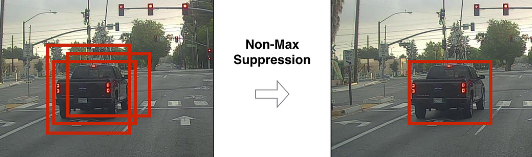

In [47]:
# NMS 적용 함수
def non_max_suppression(boxes, scores, iou_threshold):
    sorted_indices = np.argsort(scores)[::-1]
    keep_boxes = []

    while len(sorted_indices) > 0:
        current_index = sorted_indices[0]
        keep_boxes.append(current_index)

        remaining_indices = sorted_indices[1:]
        overlaps = compute_iou(boxes[current_index], boxes[remaining_indices])
        # print(overlaps)

        sorted_indices = remaining_indices[overlaps <= iou_threshold]

    return keep_boxes

# Non-Maximum Suppression(NMS)
   # 겹치는 바운딩 박스를 제거하고 가장 신뢰도가 높은 박스 선택

# sorted_indices : 신뢰도 점수에 따라 박스를 내림차순으로 정렬
# keep_boxes : 최종 선택된 박스의 인덱스 저장
# while ... 과정 반복
# compute_iou 함수 call ->  IoU 계산 -> iou_threshold 이하인 박스들만 남김

In [48]:
# NMS 적용
iou_threshold =0.25  # iou_threshold를 설정
selected_indices = non_max_suppression(boxes, scores, iou_threshold)
   # NMS를 적용하여 선택된 박스의 인덱스를 얻습니다
selected_boxes = boxes[selected_indices]
   # NMS 후 선택된 바운딩 박스가 저장


In [49]:
selected_indices

[0, 2]

In [50]:
# 원본 이미지에 바운딩 박스 그리기
for box in boxes:
    cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 2)  # 원본 박스 (파란색)

for box in selected_boxes:
    cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)  # NMS 후 박스 (초록색)

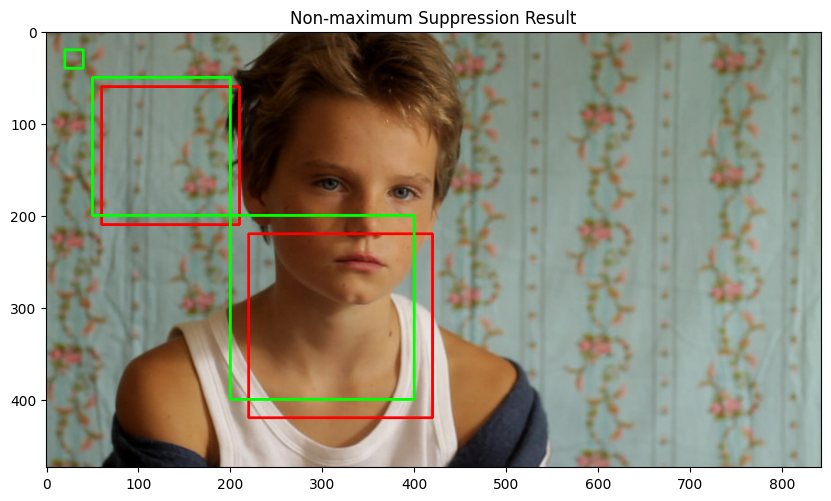

In [51]:
# 결과 시각화
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title('Non-maximum Suppression Result')
plt.show()
